# Classificar a saúde fetal para prever a mortalidade infantil e materna
### Classificação com PyCaret

A taxa de mortalidade infantil é um indicador social representado pelo número de crianças que morrem antes de completar primeiro ano de vida, é um importante indicador da qualidade dos serviços de saúde, saneamento básico, e educação de uma cidade ou região.

Paralela a mortalidade infantil, está a mortalidade materna, que é responsável por 295.000 morte durante e após a gravides e o parto, a grande maioria dessas mortes (94%), ocorre em locais com pouco recursos, e a maioria poderia ter sido evitado.

Cardiotocografia (CTG) tem por finalidade fazer um registro da atividade cardiaca fetal, é uma opção simples e de baixo custo, permitindo os profissionais de saúde atuarem na prevenção da mortalidade infantil e materna. O próprio equipamento funciona enviando pulsos de ultrassom e lendo sua resposta, lançando luz sobre a frequência cardiaca fetal, movimentos fetais, contrações uterinas, e muito mais.

Nesse projeto irei criar um modelo para classificar o resultado do teste do Cardiotocograma para garantir o bem estar do feto.

Pontos principais que serão abordados nesse projeto:

* Aquisição dos Dados
* Analise Exploratória dos Dados
* Modelo de Machine Learning
* Pycaret
* Conclusão

## Aquisição dos Dados

Esse conjunto de dados contem registros de características extraídas de exames de cardiotocograma, Dataset que está disponivel no site do [kaggle](https://www.kaggle.com/andrewmvd/fetal-health-classification).

In [1]:
# importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# arquivo de dados
DATA_FILE = 'https://raw.githubusercontent.com/villani31/DataSets/main/fetal_health.csv'

# importando dados
df = pd.read_csv(DATA_FILE)

Para melhor entendimento do Dataset, foi criado um Dicionário de Dados referente cada variável:

* `baseline value` - Valor Base frequência cardiaca fetal (batimentos por minuto).
* `accelerations` - Número de acelerações por segundos.
* `fetal_movement` - Número de movimento fetal por segundos.
* `uterine_contractions` - Número de contrações no útero por segundos.
* `light_decelerations` - Desacelerações leveis por segundos.
* `severe_decelerations` - Desacelerações severas por segundos.
* `prolongued_decelerations` - Desacelerações prolongada por segundos.
* `abnormal_short_term_variability` - Porcentagem de tempo com variações anormal de curto prazo.
* `mean_value_of_short_term_variability` - Valor médio de variações de curto prazo.
* `percentage_of_time_with_abnormal_long_term_variability` - Porcentagem de tempo com variações anormal de longo prazo.
* `mean_value_of_long_term_variability` - Valor média de variações de longo prazo.
* `histogram_width` - Largura do histograma feito usando todos os valores de um registro.
* `histogram_min` - Valor mínimo dos dados.
* `histogram_max` - Valor máximo dos dados.
* `histogram_number_of_peaks` - Número de no histograma do exame.
* `histogram_number_of_zeroes` -Número de zeros no histograma do exame.
* `histogram_mode` - É o valor dos dados que ocorre com mais frequência no conjunto de dados.
* `histogram_mean` - Valor médio.
* `histogram_median` - Valor da mediana, que estaria no meio de uma lista.
* `histogram_variance` - Variação nos valores.
* `histogram_tendency` - Tendência dos dados.
* `fetal_health` - Saúde Fetal: 1 - Normal, 2 - Suspeito, 3 - Patológico

-----------------------
A variável alvo é `fetal_health`, que foram classificados por três obstetricistas especialistas em 3 classes:

* Normal
* Suspeito
* Patológico

Somente para conhecimento, uma tabela de Referência da Frequência Cardíaca Fetal

Idade Gestacional/Tamanho do Feto	Frequência Cardíaca Normal
* 8 Semanas	inicia com 149 e termina com 172 bpm
* 9 Semanas	155-195 bpm (média 175 bpm)
* 12 Semanas	120-180 bpm (média 150 bpm)
* Após 12 Semanas	110-160 bpm (média 140 bpm)

---------------------

Nessa Dataset possui 2126 registros com 22 variáveis:

In [22]:
# dimensoes do dataset
print('Dimensões do Dataset: \n',
     'Número de linhas: ', df.shape[0], '\n',
     'Número de variáveis: ', df.shape[1])
print('----------------------------------------')

# lendos as primeiras linhas
df.head()

Dimensões do Dataset: 
 Número de linhas:  2126 
 Número de variáveis:  22
----------------------------------------


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [15]:
# ultimas linhas
df.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140.0,0.000,0.000,0.007,0.0,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.0,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.0,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.0,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0
2125,142.0,0.002,0.002,0.008,0.0,0.0,0.0,74.0,0.4,36.0,...,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0


Informações do Dataset, um resumo geral:
* Todas as variáveis com 2126, que podemos considerar que não existem valores ausentes.
* As variáveis são todas do tipo `float64`.

In [23]:
# informacoes do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Como já analisado no comando info(), não possui valores ausentes em nosso Dataset.

In [24]:
# identificar se tem valores ausentes
(df.isnull().sum() / df.shape[0] * 100)

baseline value                                            0.0
accelerations                                             0.0
fetal_movement                                            0.0
uterine_contractions                                      0.0
light_decelerations                                       0.0
severe_decelerations                                      0.0
prolongued_decelerations                                  0.0
abnormal_short_term_variability                           0.0
mean_value_of_short_term_variability                      0.0
percentage_of_time_with_abnormal_long_term_variability    0.0
mean_value_of_long_term_variability                       0.0
histogram_width                                           0.0
histogram_min                                             0.0
histogram_max                                             0.0
histogram_number_of_peaks                                 0.0
histogram_number_of_zeroes                                0.0
histogra

Resumo estatístico do conjunto de dados, podemos analisar a baixo como, `média`, `desvio padrão`, `valor mínimo`, `mediana` e `valor máximo`.

In [25]:
# resumo estatistico das variaveis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


Um gráfico de barras, que conta a quantidade referente a variável `baseline value`, quantidade de batimento por minutos:
* Conforme tabela de estatística passada, pode ter uma visão no gráfico:
    * Apenas 1 feto teve a frequência máxima de batimento por minutos de 160.
    * 136 feto deve a média de 133 batimentos por minuto.
    * 7 fetos teve 106 batimentos por minuto, sendo o valor mínimo.

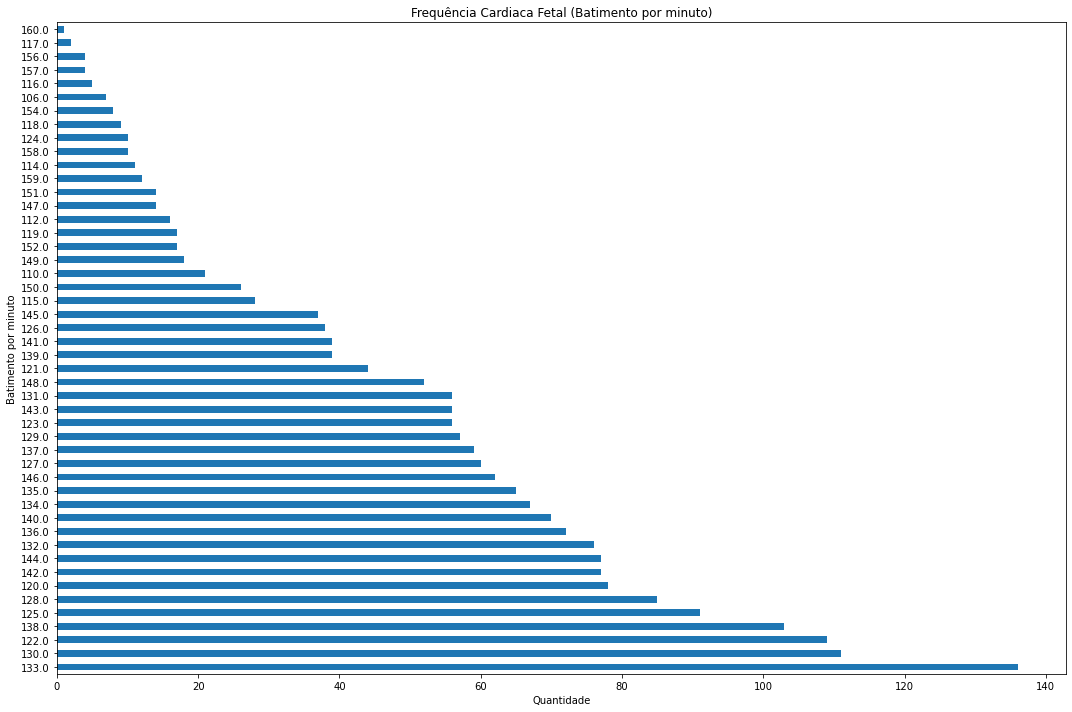

In [61]:
# grafico de barras variavel baseline_value
fig, ax = plt.subplots(figsize=(15,10))
df['baseline value'].value_counts().plot(kind='barh')
ax.set_title('Frequência Cardiaca Fetal (Batimento por minuto)')
ax.set_ylabel('Batimento por minuto')
ax.set_xlabel('Quantidade')
plt.tight_layout()

Gráfico que mostra distribuição da variável alvo:

* Normal = 1655
* Suspeito = 295
* Patológico = 176

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


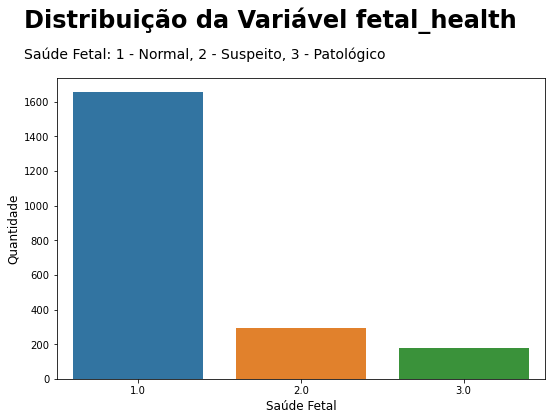

In [2]:
# plot da variavel alvo
fig, ax = plt.subplots(figsize=(8,6))
print(df.fetal_health.value_counts())
sns.countplot(data=df, x='fetal_health', ax=ax)
# titulo
ax.text(-0.7,2030, 'Distribuição da Variável fetal_health', fontsize=24, fontweight='bold')
ax.text(-0.7,1850, 'Saúde Fetal: 1 - Normal, 2 - Suspeito, 3 - Patológico', fontsize=14)
plt.xlabel('Saúde Fetal', size=12)
plt.ylabel('Quantidade', size=12)
plt.tight_layout()

Plot com a distribuição das variáveis.

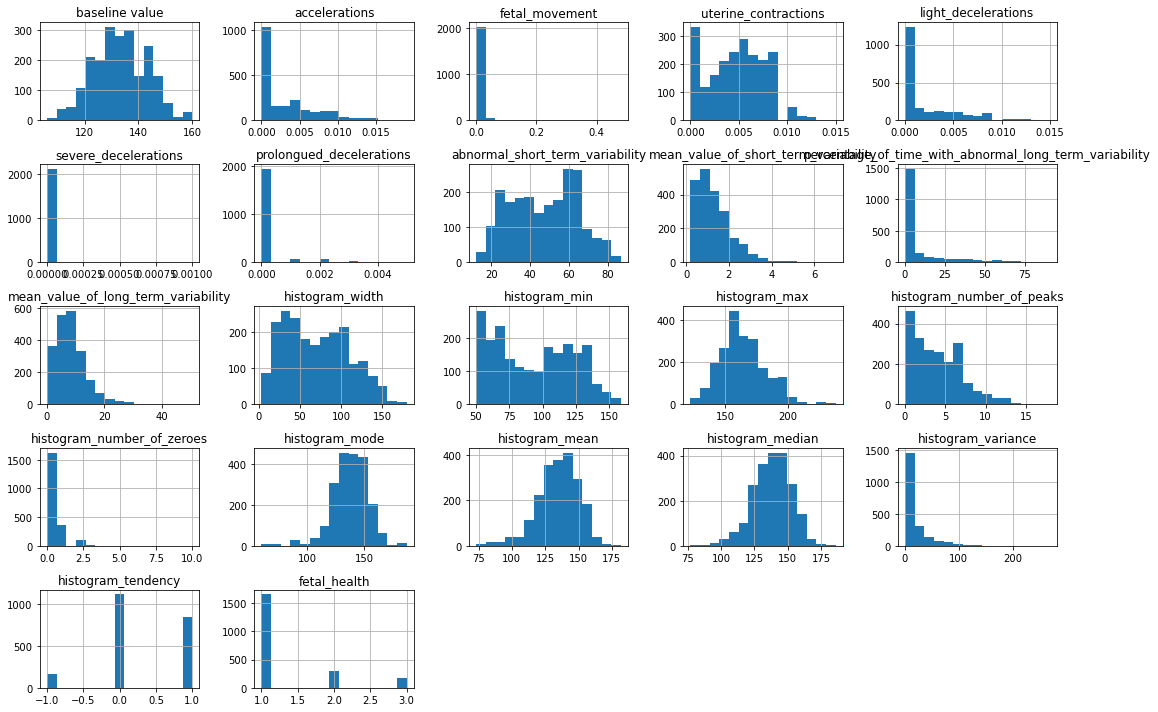

In [44]:
# histogramas
df.hist(bins=15, figsize=(15,10))
plt.tight_layout()

Analise de correlação entre as variáveis.

<AxesSubplot:>

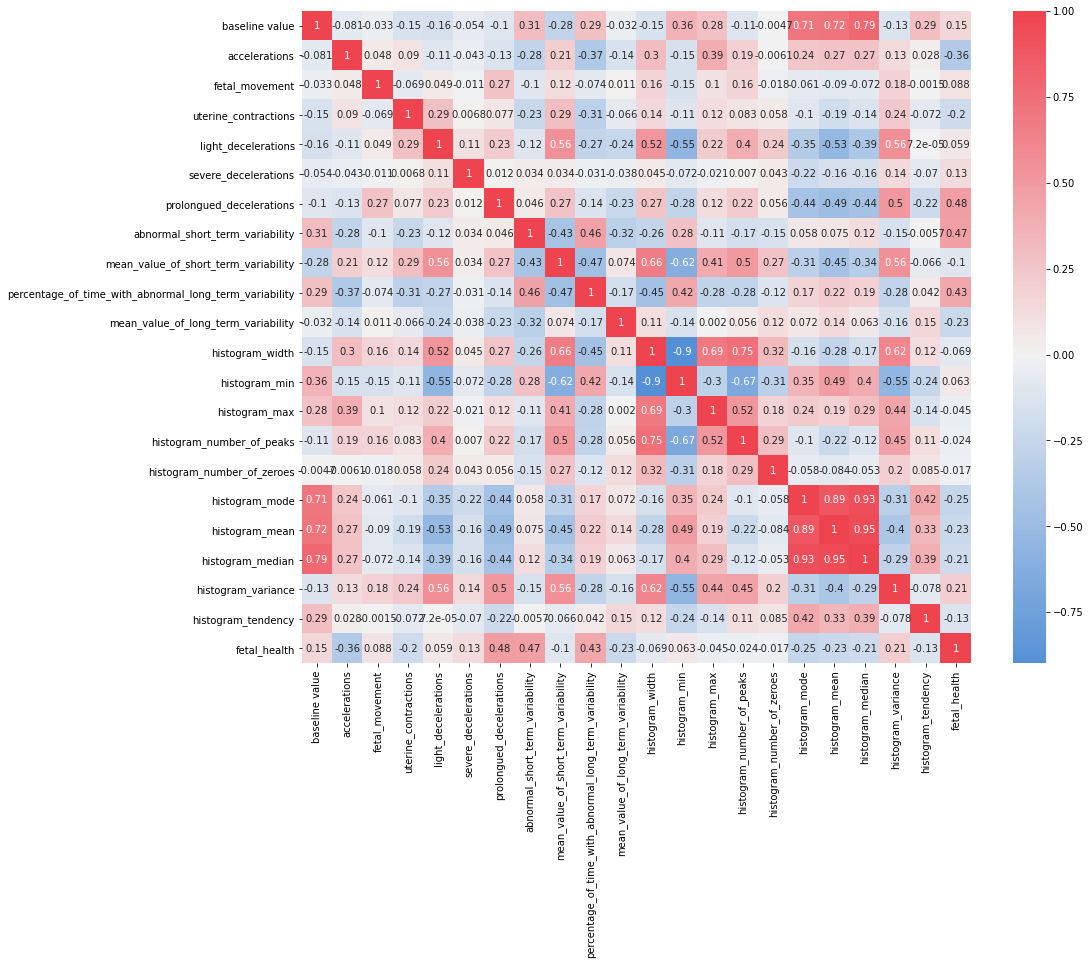

In [26]:
# matriz de correlação
corr = df.corr()
plt.figure(figsize=(15,12))
cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap, center=0)

## Pandas Profiling

Uma biblioteca que facilita a análise de forma mais rápida e prática.

In [3]:
# importando pacote
from pandas_profiling import ProfileReport

# Criar profile report
report = ProfileReport(df, title='Report',html={'style':{'full_width':True}}, minimal=True)

# criar visualização iframe
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Erro ao executar função com Pycaret

Durante o processo de Machine Learning usando o Pycaret, no método `predict_model()`, ocorre o erro conforme imagem a baixo, isso acontece porque a variável alvo que é `fetal_health`, tem as classe definida como (1, 2, 3), mas não sei explicar por qual razão, ocorre o erro no index 3, sendo necessário alterar as classe para (0, 1, 2), começando a partir do 0.

Por esse motivo, irei alterar, antes de dar sequência.

In [4]:
# exibindo imagem
from IPython.display import Image
Image(filename='img-erro.png', width=1000, hight=400)

TypeError: __init__() got an unexpected keyword argument 'hight'

In [4]:
# alteracao
df['fetal_health'] = df['fetal_health'].replace([1., 2., 3.],[0, 1, 2])

Visualizar gráfico após alteração na variável alvo.

0.0    1655
1.0     295
2.0     176
Name: fetal_health, dtype: int64


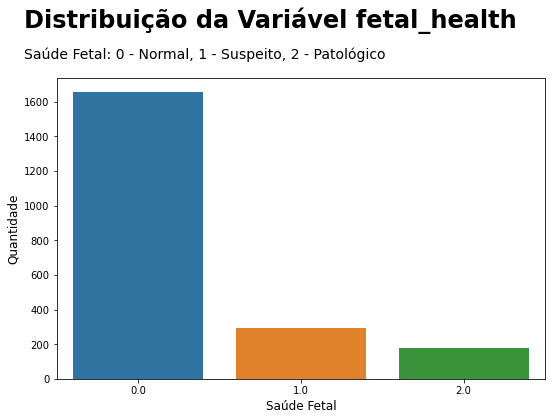

In [5]:
# plot da variavel alvo
fig, ax = plt.subplots(figsize=(8,6))
print(df.fetal_health.value_counts())
sns.countplot(data=df, x='fetal_health', ax=ax)
# titulo
ax.text(-0.7,2030, 'Distribuição da Variável fetal_health', fontsize=24, fontweight='bold')
ax.text(-0.7,1850, 'Saúde Fetal: 0 - Normal, 1 - Suspeito, 2 - Patológico', fontsize=14)
plt.xlabel('Saúde Fetal', size=12)
plt.ylabel('Quantidade', size=12)
plt.tight_layout()

## Modelo de Machine Learning

Machine Learning é uma tecnologia onde os computadores tem a capacidade de aprender de acordo com as respostas esperadas por meio de associações de diferentes dados.

* Nesse projeto vamos utilizar a técnica de AutoML, com o framework PyCaret.

Vamos iniciar separando os dados de teste e treino, lembrando que os dados de teste não podem ser usados para treinar o modelo, quando estivermos com nosso modelo pronto, ai sim, usaremos o modelo de teste, para fazer previsões.

In [6]:
# separar entre dados de treino e teste
test = df.sample(frac=0.15)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

# Dimensoes
print('Dataset completo:\t',df.shape)
print('Dataset de teste:\t',test.shape)
print('Dataset de treino:\t',train.shape)

Dataset completo:	 (2126, 22)
Dataset de teste:	 (319, 22)
Dataset de treino:	 (1807, 22)


### Configurando ambiente no Pycaret

Importando os pacotes

In [7]:
# importando os pacotes
from pycaret.classification import *
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

Vamos criar um modelo de classificação (clf), passando os dados de treino com a variável alvo `fetal_health`.

* Através do setup, é onde criamos nosso `pipeline`.

Por exemplo:

In [17]:
# criando o setup do Pycaret
clf = setup(data=train, target='fetal_health', 
            normalize=True,
           transformation=True,
           log_experiment=True, fold=5)

,Description,Value
0,session_id,2753
1,Target,fetal_health
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1807, 22)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


## Comparando os Modelos

Vamos comprar as diferenças entre os modelos, para verificar a performance entre eles, em nosso conjunto de dados, baseado na métrica de avaliação.

* Accuracy - quanto o modelo classificou corretamente considerando todas as classes.

Usamos a acurácia como métrica de avaliação.

In [18]:
# comparando melhor modelo
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9422,0.9853,0.8764,0.9427,0.9402,0.8346,0.8378,0.1720
xgboost,Extreme Gradient Boosting,0.9407,0.9837,0.8757,0.9394,0.9385,0.8295,0.8322,21.1960
gbc,Gradient Boosting Classifier,0.9383,0.9766,0.8729,0.9383,0.9366,0.8239,0.8266,0.4600
rf,Random Forest Classifier,0.9304,0.9841,0.8372,0.9287,0.9262,0.7928,0.7999,0.1860
et,Extra Trees Classifier,0.9233,0.9802,0.8217,0.9209,0.9194,0.7748,0.7796,0.1600
dt,Decision Tree Classifier,0.9122,0.8817,0.8430,0.9143,0.9120,0.7574,0.7593,0.0200
knn,K Neighbors Classifier,0.8971,0.9511,0.7655,0.8951,0.8935,0.6989,0.7026,0.0500
lr,Logistic Regression,0.8916,0.9631,0.7631,0.8898,0.8896,0.6926,0.6945,0.0500
ada,Ada Boost Classifier,0.8845,0.8627,0.7316,0.8820,0.8763,0.6477,0.6588,0.0940
ridge,Ridge Classifier,0.8758,0.0000,0.6575,0.8678,0.8636,0.6077,0.6235,0.0140


Com poucas linha de código, podemos destacar o melhor modelo, que foi `lightgbm`, ordenando pela métrica `Accuracy`.

`lightgbm` - é uma estrutura de aumento de gradiente que usa algoritmos de aprendizado baseados em árvore. Ele foi projetado para ser distribuído e eficiente com as seguintes vantagens:

* Velocidade de treinamento mais rápida e maior eficiência.
* Menor uso de memória.
* Melhor precisão.
* Suporte de aprendizado paralelo, distribuído e GPU.
* Capaz de lidar com dados em grande escala.

A baixo podemos ver os parâmetros usando no melhor modelo:

In [19]:
# verificando o melhor modelo
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2753, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Instanciando o Modelo

Agora que vimos qual o melhor modelo, é hora de instanciar o modelo, e fazer um tunning de parâmetros para que tenha o melhor resultado final.

Por padrão, o Pycaret já faz a divisão dentro do conjunto de treino em conjuntos de validação, para trabalhar com 10 folds de validação.

In [20]:
# instancia o modelo
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9526,0.9883,0.9033,0.9516,0.9513,0.8652,0.8663
1,0.9407,0.9843,0.8604,0.9443,0.9361,0.8227,0.8317
2,0.9486,0.9840,0.9168,0.9488,0.9484,0.8581,0.8583
3,0.9328,0.9796,0.8436,0.9326,0.9318,0.8140,0.8145
4,0.9365,0.9903,0.8580,0.9359,0.9335,0.8132,0.8184
Mean,0.9422,0.9853,0.8764,0.9427,0.9402,0.8346,0.8378
SD,0.0074,0.0037,0.0284,0.0073,0.0080,0.0224,0.0209


Verificando os parâmetros utilizados para criar o modelo.

In [21]:
# verificar os parametros
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2753, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Tuning do Modelo (Hyperparameter)

Com o Pycaret é fácil fazer otimização dos parâmetros, basta utilizar a técnica `tune_model`, passando como parâmetro o modelo a ser otimizado, e a métrica pelo qual quer ser otimizada.

In [22]:
# tuning
#tuned_xgboost = tune_model(xgboost)
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9605,0.9837,0.8991,0.9609,0.9583,0.8833,0.8885
1,0.9407,0.9841,0.8604,0.9417,0.9360,0.8210,0.8307
2,0.9289,0.9786,0.8857,0.9284,0.9283,0.8036,0.8037
3,0.9407,0.9749,0.8618,0.9393,0.9396,0.8338,0.8346
4,0.9365,0.9885,0.8421,0.9346,0.9333,0.8131,0.8180
Mean,0.9415,0.9820,0.8698,0.9410,0.9391,0.8309,0.8351
SD,0.0105,0.0047,0.0201,0.0110,0.0103,0.0280,0.0288


Verificar parâmetros usado no `tuning`.

In [23]:
# verificando parametros
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=160, n_jobs=-1, num_leaves=60, objective=None,
               random_state=2753, reg_alpha=0.01, reg_lambda=10, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Plotar Modelo

Como o Pycaret facilita a parte de Machine Learning, a visualização dos resultados, não pode ser diferente. Usando `plot_model()`, para plotar visualizações sobre a performance do nosso modelo, essa função recebe o modelo treinado como entrada de dados, e retorna o plot baseado no desempenho com pedaço do conjunto de dados separado para teste.

Plotar Matriz de confusão dos resultado:

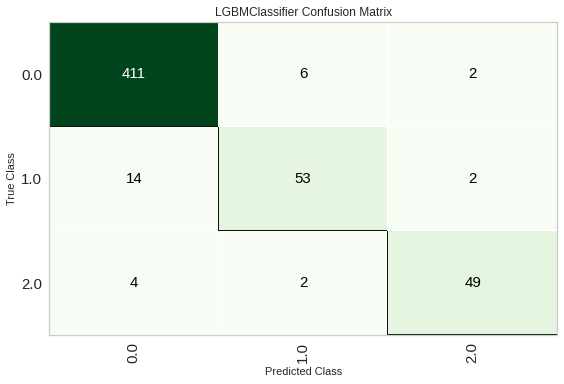

In [24]:
# matriz de confusão
plot_model(tuned_lightgbm, plot='confusion_matrix')

Nesse plot a importância de cada variável.

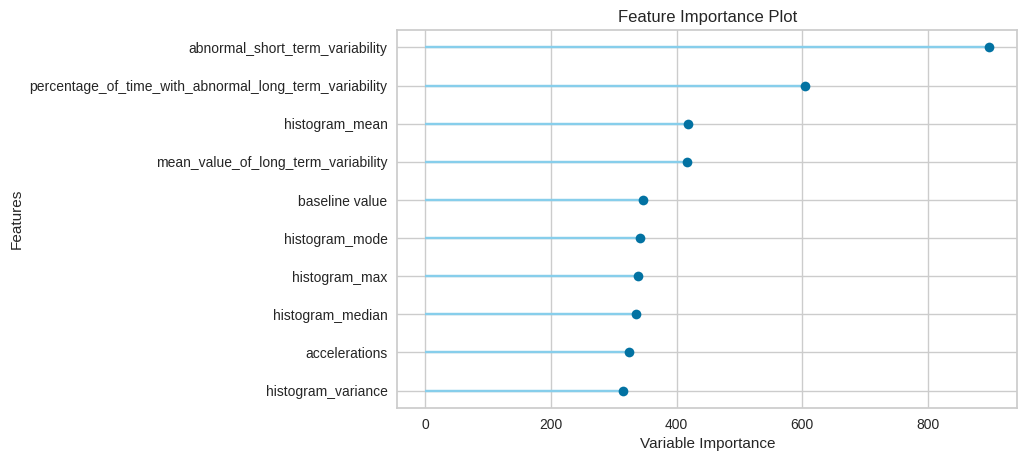

In [25]:
# feature importances
plot_model(tuned_lightgbm, plot='feature')

Erro de previsão, cada barra mostra a proporção de previsões (incluindo falsos negativos, e falsos positivos), e quais classes o classificador está tendo dificuldade para ter a resposta correta.

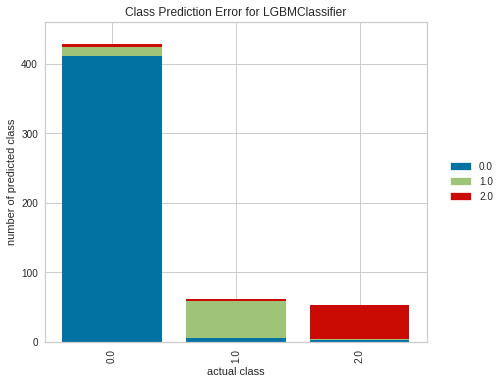

In [26]:
# previsao de erro
plot_model(tuned_lightgbm, plot='error')

Plot da curva de validação, é usada para determinar a eficácia de um estimador nos dados em que foi treinado.

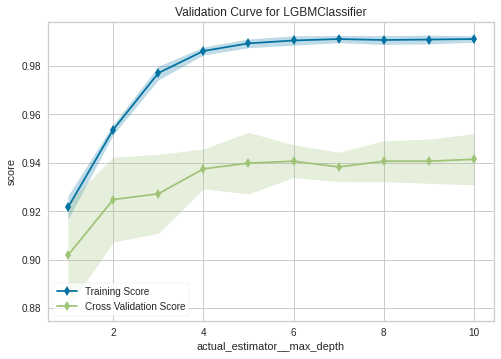

In [27]:
# curva de validacao
plot_model(tuned_lightgbm, plot='vc')

## Finalizar Modelo

Agora é hora de fazer previsões de nosso conjunto de testes.

In [28]:
# fazendo previsões
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9448,0.9914,0.8800,0.9433,0.9435,0.8491,0.8503


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,...,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,severe_decelerations_0.0010000000474974513,fetal_health,Label,Score
0,-0.026105,-1.017902,-0.238222,0.246366,1.085573,3.678249,0.775422,1.524696,-0.742309,0.155579,...,-0.561307,-2.093921,-2.155816,-2.055541,1.451865,-0.582911,0.0,2.0,2,0.9724
1,1.216862,-1.017902,-0.628095,-0.782246,-0.781633,-0.271876,0.127941,-0.965239,-0.067234,0.749032,...,-0.561307,1.510305,1.535317,1.477946,-0.779013,1.118686,0.0,1.0,1,0.8574
2,-0.129011,1.497153,-0.628095,1.826420,-0.781633,-0.271876,-1.145475,0.709562,-0.742309,0.703673,...,-0.561307,0.773995,0.714609,0.736347,0.641826,1.118686,0.0,0.0,0,0.9980
3,0.490233,1.819986,-0.628095,-0.431655,0.178943,-0.271876,0.186518,0.255802,-0.742309,-1.356877,...,1.748998,0.543428,0.714609,0.656762,0.122309,1.118686,0.0,0.0,0,0.9981
4,1.529271,-1.017902,-0.628095,-0.431655,-0.781633,-0.271876,0.598214,-1.184787,1.411633,0.429213,...,-0.561307,1.012339,1.198616,1.060593,-1.063366,1.118686,0.0,0.0,0,0.7807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,-1.254710,0.600888,-0.628095,1.519087,1.287475,-0.271876,-0.742892,-0.035159,-0.742309,-0.223183,...,1.748998,-0.756397,-0.839493,-0.906652,1.105980,1.118686,0.0,0.0,0,0.9991
539,-0.539528,1.280117,1.279715,-0.088223,1.287475,3.677996,-1.546329,1.132462,-0.742309,-1.356877,...,-0.561307,-0.348011,-0.663029,-0.447182,1.481617,-0.582911,0.0,0.0,0,0.9859
540,0.283371,-1.017902,-0.628095,0.572808,1.085573,-0.271876,0.539240,-0.035159,1.644622,0.014817,...,1.901495,0.039564,0.044884,0.044952,0.210667,1.118686,0.0,0.0,0,0.9793
541,2.678590,-1.017902,-0.628095,-0.088223,-0.781633,-0.271876,1.309275,-1.656434,1.440303,-0.200731,...,-0.561307,1.856712,2.148442,1.994289,-1.215143,1.118686,0.0,1.0,1,0.9533


In [29]:
# finalizando o modelo
final_lightgbm = finalize_model(tuned_lightgbm)

In [30]:
# verificando parametros
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=0, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=160, n_jobs=-1, num_leaves=60, objective=None,
               random_state=2753, reg_alpha=0.01, reg_lambda=10, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Prevendo dados novos

Vamos prever os dados novos, usando o conjunto de dados separado para teste.

In [31]:
# fazendo previsao com conjunto de teste
test_preds = predict_model(final_lightgbm, data=test)

In [33]:
# listando as primeiras linhas
test_preds.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Label,Score
0,156.0,0.000,0.000,0.011,0.008,0.0,0.001,34.0,5.4,0.0,...,8.0,0.0,117.0,131.0,136.0,108.0,0.0,1.0,0,0.6205
1,130.0,0.008,0.014,0.006,0.000,0.0,0.000,34.0,2.1,0.0,...,5.0,0.0,159.0,146.0,151.0,39.0,1.0,0.0,0,0.9974
2,138.0,0.003,0.002,0.007,0.008,0.0,0.000,51.0,2.3,0.0,...,6.0,0.0,138.0,131.0,139.0,41.0,1.0,0.0,0,0.9992
3,128.0,0.011,0.011,0.005,0.003,0.0,0.000,36.0,1.6,0.0,...,5.0,0.0,137.0,135.0,139.0,18.0,0.0,0.0,0,0.9990
4,143.0,0.000,0.000,0.002,0.000,0.0,0.000,68.0,0.3,5.0,...,1.0,0.0,144.0,144.0,145.0,1.0,0.0,0.0,0,0.6227


0    248
1     46
2     25
Name: Label, dtype: int64


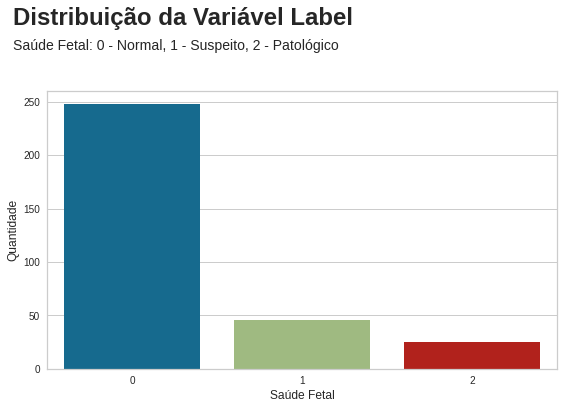

In [68]:
# plot da variavel alvo
fig, ax = plt.subplots(figsize=(8,6))
print(test_preds.Label.value_counts())
sns.countplot(data=test_preds, x='Label', ax=ax)
# titulo
ax.text(-0.7,322, 'Distribuição da Variável Label', fontsize=24, fontweight='bold')
ax.text(-0.7,299, 'Saúde Fetal: 0 - Normal, 1 - Suspeito, 2 - Patológico', fontsize=14)
plt.xlabel('Saúde Fetal', size=12)
plt.ylabel('Quantidade', size=12)
plt.tight_layout()

In [97]:
# porcentagem das distribuicao da variavel Label
print('Porcentagem da previsão sobre os dados novos:')
print('---------------------------------------------')
print('Saúde fetal {}% como Normal'.format(round(test_preds['Label'].
                                                 loc[test_preds['Label'] == 0].count() / test_preds.shape[0] * 100,2)))
print('Saúde fetal {}% como Suspeito'.format(round(test_preds['Label'].
                                                 loc[test_preds['Label'] == 1].count() / test_preds.shape[0] * 100,2)))
print('Saúde fetal {}% como Patológico'.format(round(test_preds['Label'].
                                                 loc[test_preds['Label'] == 2].count() / test_preds.shape[0] * 100,2)))

Porcentagem da previsão sobre os dados novos:
---------------------------------------------
Saúde fetal 77.74% como Normal
Saúde fetal 14.42% como Suspeito
Saúde fetal 7.84% como Patológico
